# Sieć ograniczenia

In [1]:
from matplotlib import pyplot as plt
import numpy as np

from main import test_genetic_algorithm, plot_results, test_differential_algorithm
from data_reader import parse_sndlib_file
from itertools import product


with open("data.txt", "r") as file:
    file_content = file.read()
data = parse_sndlib_file(file_content)

## Algorytm genetyczny:

Poniżej przedstawiono wyniki uruchomienia algorytmu genetycznego dla 100 generacji dla domyślnych parametrów

8250


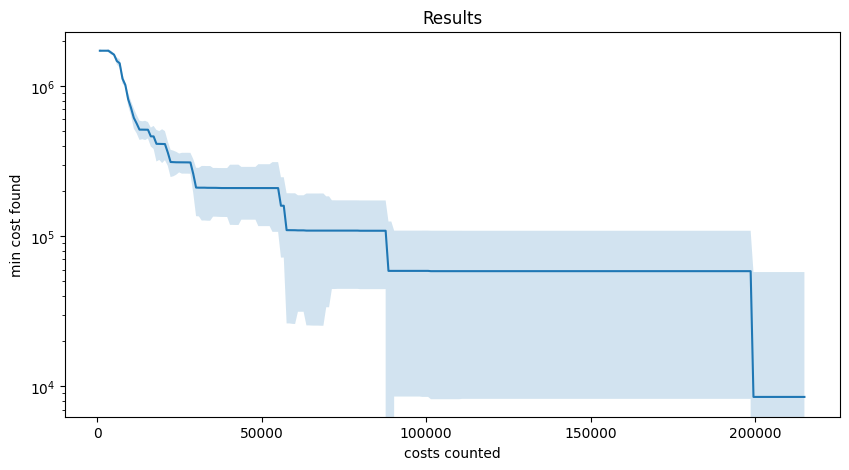

In [2]:
results, costs_counter = test_genetic_algorithm(data, n_generations=250)

medians = np.median(results, axis=0)
stds = np.std(results, axis=0)

print(np.min(results))

plt.figure(figsize=(10, 5))
plt.plot(costs_counter, medians)

plt.fill_between(
    costs_counter,
    medians - stds,
    medians + stds,
    alpha=0.2,
)

plt.xlabel("costs counted")
plt.ylabel("min cost found")
plt.yscale("log")
plt.title("Results")
plt.show()

### Eksperymenty


#### Rozmiar populacji


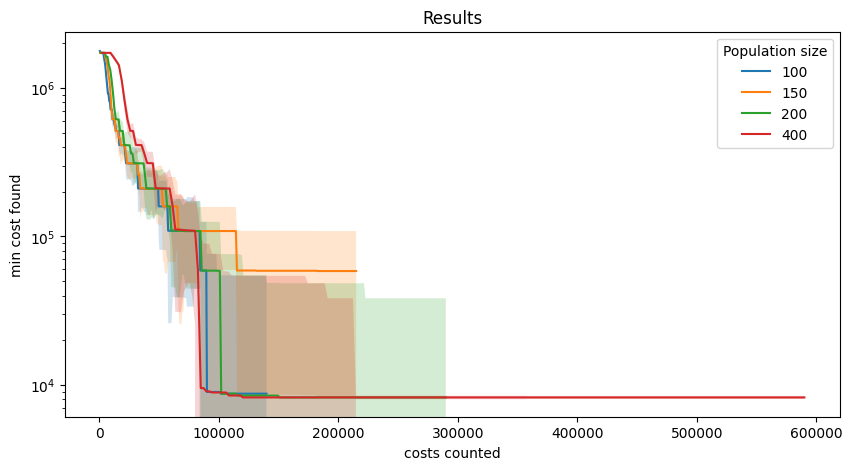

In [3]:
population_sizes = [100, 150, 200, 400]
population_medians, population_stds, costs_counter = [], [], []
for population_size in population_sizes:
    results, cost_counter  = test_genetic_algorithm(data, population_size=population_size, n_generations=250)
    
    medians = np.median(results, axis=0)
    stds = np.std(results, axis=0)

    population_medians.append(medians)
    population_stds.append(stds)
    costs_counter.append(cost_counter)

plot_results('Population size', population_sizes, population_medians, population_stds, costs_counter)


#### Rozmiar elity


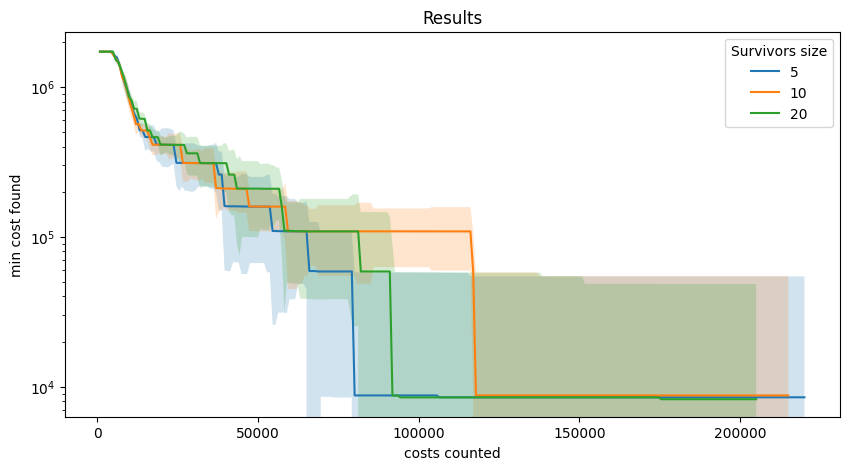

In [4]:
surviors_sizes = [5, 10, 20]
survior_medians, surviors_std, costs_counter = [], [], []
for surviors in surviors_sizes:
    results, cost_counter  = test_genetic_algorithm(data, survivors=surviors, n_generations=250)

    medians = np.median(results, axis=0)
    stds = np.std(results, axis=0)

    survior_medians.append(medians)
    surviors_std.append(stds)
    costs_counter.append(cost_counter)

plot_results('Survivors size', surviors_sizes, survior_medians, surviors_std, costs_counter)

#### Mutacja
Algorytm został uruchomiony z różnymi mutacjami, szansami mutacji i ich siłami w każdej możliwej kombinacji

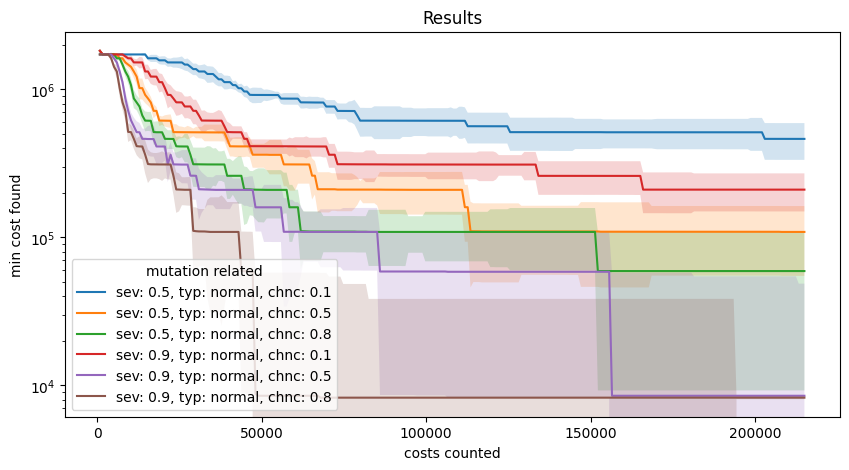

In [5]:
mutation_severities = [0.5, 0.9]
mutation_types = ["normal"]
mutation_chances = [0.1, 0.5, 0.8]

combinations = list(product(mutation_severities, mutation_types, mutation_chances))

mutation_medians, mutation_std, costs_counter, mutation_labels = [], [], [], []
for severity, type, chance in combinations:
    mutation_labels.append(f"sev: {severity}, typ: {type}, chnc: {chance}")
    results, cost_counter  = test_genetic_algorithm(data, severity_of_mutation=severity, mutation_type=type, mutation_chance=chance, n_generations=250)

    medians = np.median(results, axis=0)
    stds = np.std(results, axis=0)

    mutation_medians.append(medians)
    mutation_std.append(stds)
    costs_counter.append(cost_counter)

plot_results('mutation related', mutation_labels, mutation_medians, mutation_std, costs_counter)

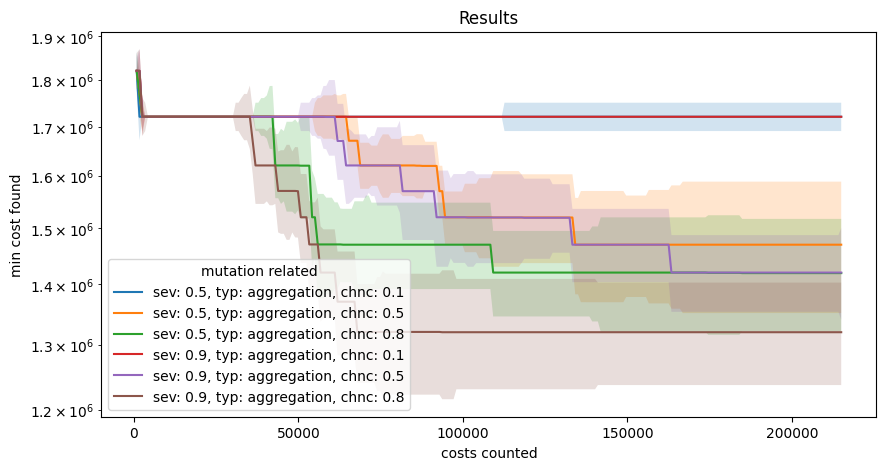

In [6]:
mutation_severities = [0.5, 0.9]
mutation_types = ["aggregation"]
mutation_chances = [0.1, 0.5, 0.8]

combinations = list(product(mutation_severities, mutation_types, mutation_chances))

mutation_medians, mutation_std, costs_counter, mutation_labels = [], [], [], []
for severity, type, chance in combinations:
    mutation_labels.append(f"sev: {severity}, typ: {type}, chnc: {chance}")
    results, cost_counter  = test_genetic_algorithm(data, severity_of_mutation=severity, mutation_type=type, mutation_chance=chance, n_generations=250)

    medians = np.median(results, axis=0)
    stds = np.std(results, axis=0)

    mutation_medians.append(medians)
    mutation_std.append(stds)
    costs_counter.append(cost_counter)

plot_results('mutation related', mutation_labels, mutation_medians, mutation_std, costs_counter)

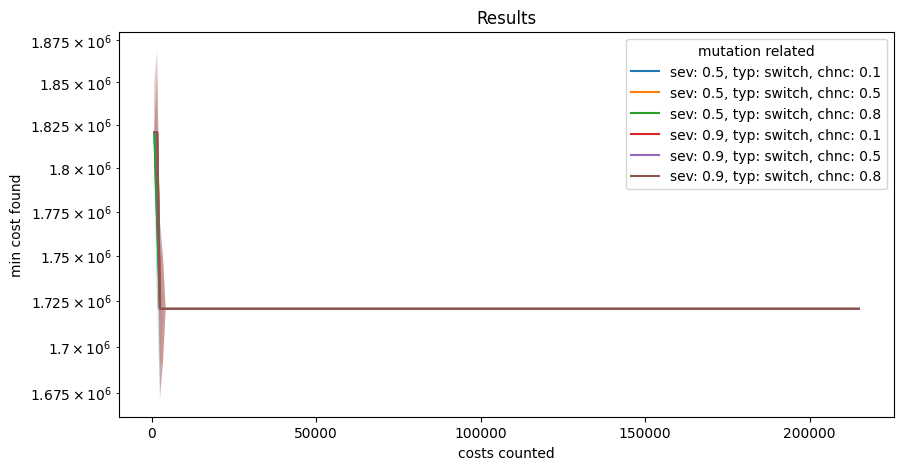

In [7]:
mutation_severities = [0.5, 0.9]
mutation_types = ["switch"]
mutation_chances = [0.1, 0.5, 0.8]

combinations = list(product(mutation_severities, mutation_types, mutation_chances))

mutation_medians, mutation_std, costs_counter, mutation_labels = [], [], [], []
for severity, type, chance in combinations:
    mutation_labels.append(f"sev: {severity}, typ: {type}, chnc: {chance}")
    results, cost_counter  = test_genetic_algorithm(data, severity_of_mutation=severity, mutation_type=type, mutation_chance=chance, n_generations=250)

    medians = np.median(results, axis=0)
    stds = np.std(results, axis=0)

    mutation_medians.append(medians)
    mutation_std.append(stds)
    costs_counter.append(cost_counter)

plot_results('mutation related', mutation_labels, mutation_medians, mutation_std, costs_counter)

#### Krzyżowanie
Algorytm został uruchomiony z krzyżowaniem agregacyjnym i zwykłym

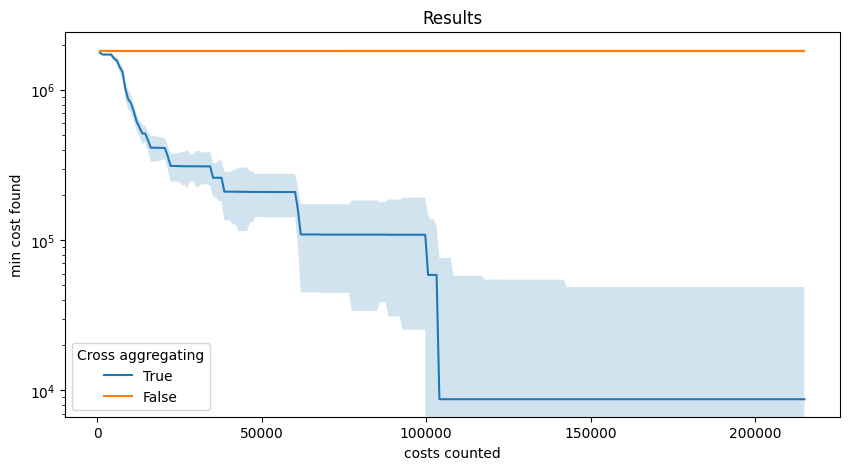

In [8]:
aggregate_medians, aggregate_std, costs_counter = [], [], []
for aggregate in [True, False]:
    results, cost_counter  = test_genetic_algorithm(data, cross_aggregating=aggregate, n_generations=250)

    medians = np.median(results, axis=0)
    stds = np.std(results, axis=0)

    aggregate_medians.append(medians)
    aggregate_std.append(stds)
    costs_counter.append(cost_counter)
plot_results('Cross aggregating', [True, False], aggregate_medians, aggregate_std, costs_counter)

### Kombinacje

algorytm został wywołany dla wszystkich kombinacji mutacji, krzyżowań i sposobów generowania danych. 

Krzyżowanie unikające rozkładu zasobów na wiele ścieżek i zwykłe  

Mutacji skupiającej się na wymianie rozwiązań dla dwóch ścieżek pomiędzy sobą, zgrupowaniu zasobów na mniejszej ilości ścieżek, oraz rozłożeniu zasobów na większej ilości ścieżek

Dane początkowe są generowane przez podział wymaganych zasobów do przesłania na 'n' równych części które następnie są losowo rozkładane pomiędzy możliwe ścieżki. Pozwalając na rozpoczęcie z limitem używanych ścieżek na rozwiązanie

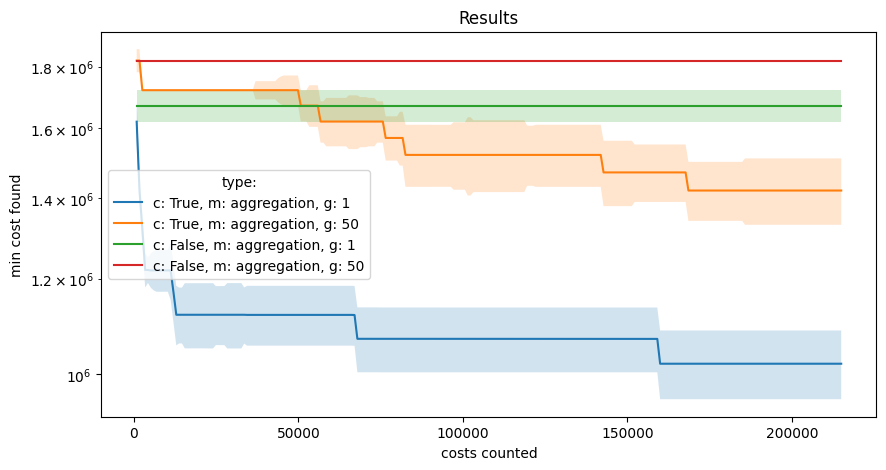

In [ ]:
a_medians, a_std, a_labels, costs_counter = [], [], [], []

cross_aggr = [True, False]
mut_type = ["aggregation"]
init_type = [1, 50]

combinations = list(product(cross_aggr, mut_type, init_type))

for cross, mut, init in combinations:
    a_labels.append(f"c: {cross}, m: {mut}, g: {init}")
    results, cost_counter  = test_genetic_algorithm(data, cross_aggregating=cross, mutation_type=mut, num_of_init_chunks=init, n_generations=250)

    medians = np.median(results, axis=0)
    stds = np.std(results, axis=0)

    a_medians.append(medians)
    a_std.append(stds)
    costs_counter.append(cost_counter)


plot_results('type:', a_labels, a_medians, a_std, costs_counter)


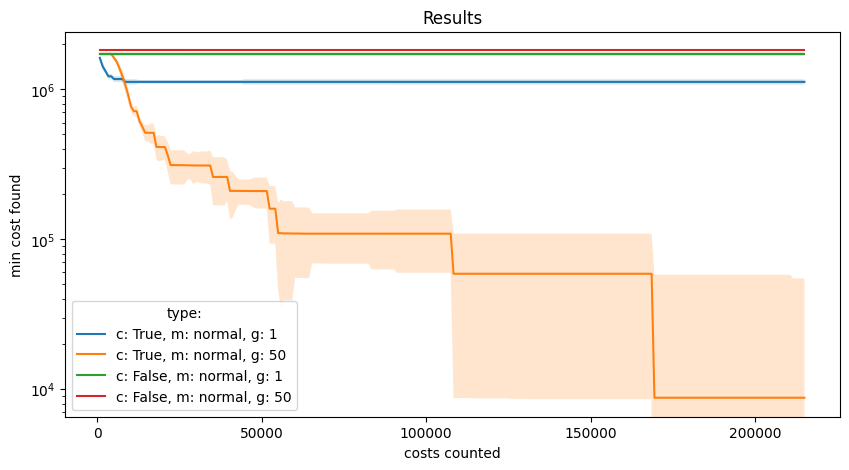

In [10]:
a_medians, a_std, a_labels, costs_counter = [], [], [], []

cross_aggr = [True, False]
mut_type = ["normal"]
init_type = [1, 50]

combinations = list(product(cross_aggr, mut_type, init_type))

for cross, mut, init in combinations:
    a_labels.append(f"c: {cross}, m: {mut}, g: {init}")
    results, cost_counter  = test_genetic_algorithm(data, cross_aggregating=cross, mutation_type=mut, num_of_init_chunks=init, n_generations=250)

    medians = np.median(results, axis=0)
    stds = np.std(results, axis=0)

    a_medians.append(medians)
    a_std.append(stds)
    costs_counter.append(cost_counter)


plot_results('type:', a_labels, a_medians, a_std, costs_counter)


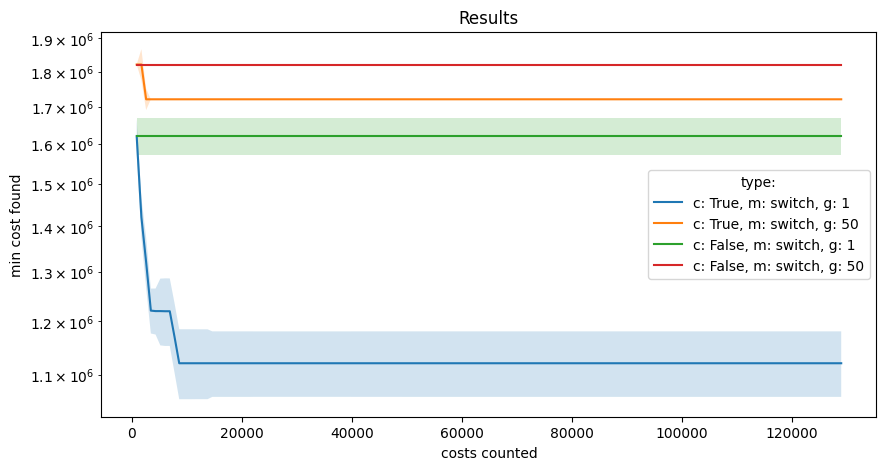

In [11]:
a_medians, a_std, a_labels, costs_counter = [], [], [], []

cross_aggr = [True, False]
mut_type = ["switch"]
init_type = [1, 50]

combinations = list(product(cross_aggr, mut_type, init_type))

for cross, mut, init in combinations:
    a_labels.append(f"c: {cross}, m: {mut}, g: {init}")
    results, cost_counter  = test_genetic_algorithm(data, cross_aggregating=cross, mutation_type=mut, num_of_init_chunks=init, n_generations=150)

    medians = np.median(results, axis=0)
    stds = np.std(results, axis=0)

    a_medians.append(medians)
    a_std.append(stds)
    costs_counter.append(cost_counter)


plot_results('type:', a_labels, a_medians, a_std, costs_counter)


In [2]:
from matplotlib import pyplot as plt
import numpy as np

from main import test_genetic_algorithm, plot_results, test_differential_algorithm
from data_reader import parse_sndlib_file
from itertools import product


with open("data.txt", "r") as file:
    file_content = file.read()
data = parse_sndlib_file(file_content)

## Algorytm różnicowy:

Poniżej przedstawiono wyniki uruchomienia algorytmu różnicowego dla 250 generacji.\
Algorytm dla domyślnych parametrów znajduje minimum lokalne (8250) około 200 generacji.

In [4]:
results, costs_counter = test_differential_algorithm(data, n_generations=300)

medians = np.median(results, axis=0)
stds = np.std(results, axis=0)

print(np.min(results))

plt.figure(figsize=(10, 5))
plt.plot(costs_counter, medians)

plt.fill_between(
    costs_counter,
    medians - stds,
    medians + stds,
    alpha=0.2,
)

plt.xlabel("costs counted")
plt.ylabel("min cost found")
plt.yscale("log")
plt.title("Results")
plt.show()

KeyboardInterrupt: 

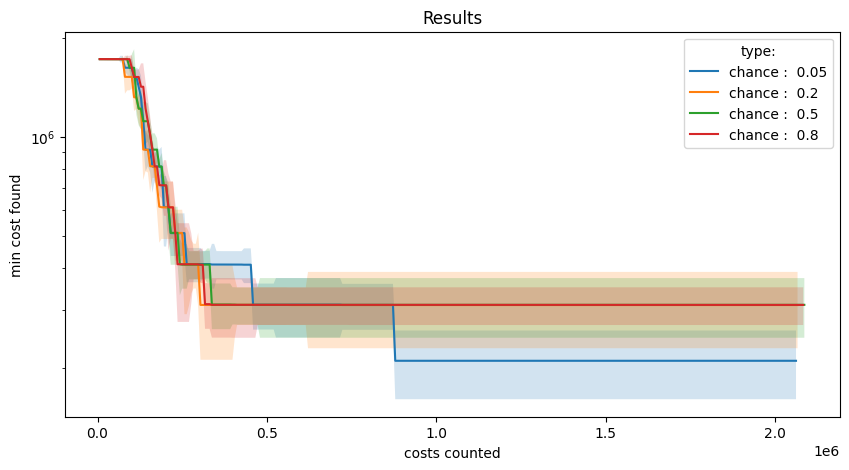

In [5]:
a_medians, a_std, a_labels, costs_counter = [], [], [], []

mut_aggr_chance = [0.05, 0.2, 0.5, 0.8]

for chance in mut_aggr_chance:
    a_labels.append(f"chance :  {chance}")
    results, cost_counter  = test_differential_algorithm(data, smoothing_mutation_chance=chance, n_generations=300)

    medians = np.median(results, axis=0)
    stds = np.std(results, axis=0)

    a_medians.append(medians)
    a_std.append(stds)
    costs_counter.append(cost_counter)


plot_results('type:', a_labels, a_medians, a_std, costs_counter)


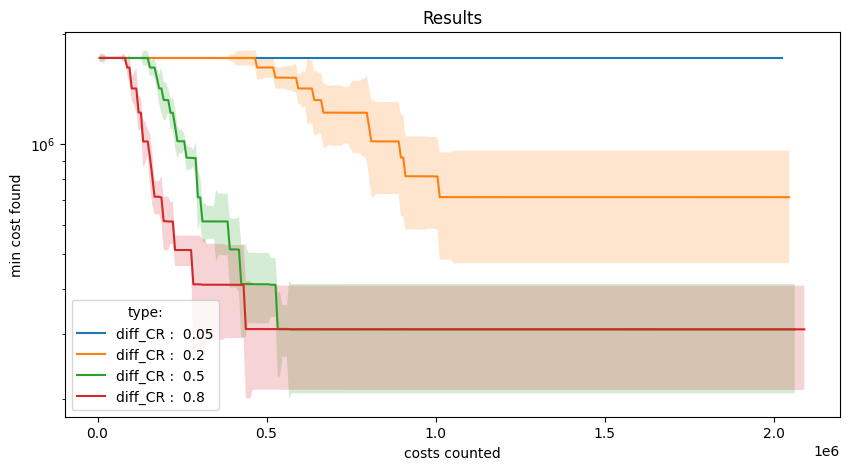

In [ ]:
a_medians, a_std, a_labels, costs_counter = [], [], [], []

diff_CR_s = [0.05, 0.2, 0.5, 0.8, 1]

for diff_CR in diff_CR_s:
    a_labels.append(f"diff_CR :  {diff_CR}")
    results, cost_counter  = test_differential_algorithm(data, diff_CR=diff_CR, n_generations=300)

    medians = np.median(results, axis=0)
    stds = np.std(results, axis=0)

    a_medians.append(medians)
    a_std.append(stds)
    costs_counter.append(cost_counter)


plot_results('type:', a_labels, a_medians, a_std, costs_counter)


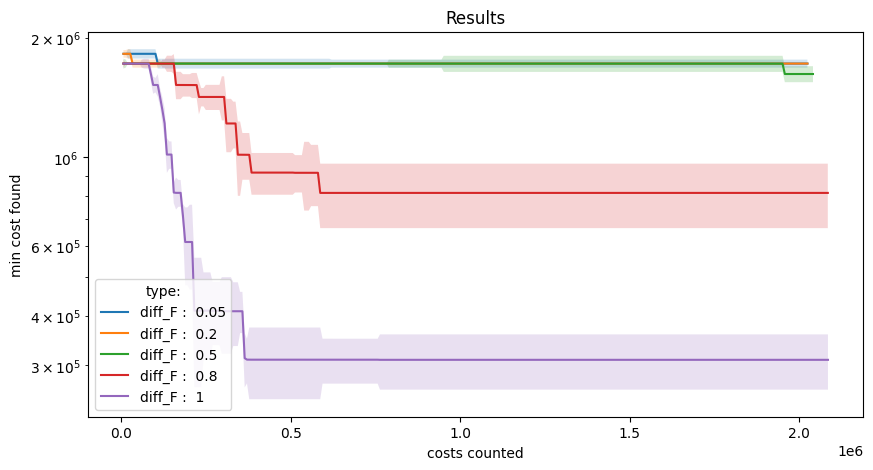

In [2]:
a_medians, a_std, a_labels, costs_counter = [], [], [], []

diff_F_s = [0.05, 0.2, 0.5, 0.8, 1]

for diff_F in diff_F_s:
    a_labels.append(f"diff_F :  {diff_F}")
    results, cost_counter  = test_differential_algorithm(data, diff_F=diff_F, n_generations=300)

    medians = np.median(results, axis=0)
    stds = np.std(results, axis=0)

    a_medians.append(medians)
    a_std.append(stds)
    costs_counter.append(cost_counter)


plot_results('type:', a_labels, a_medians, a_std, costs_counter)


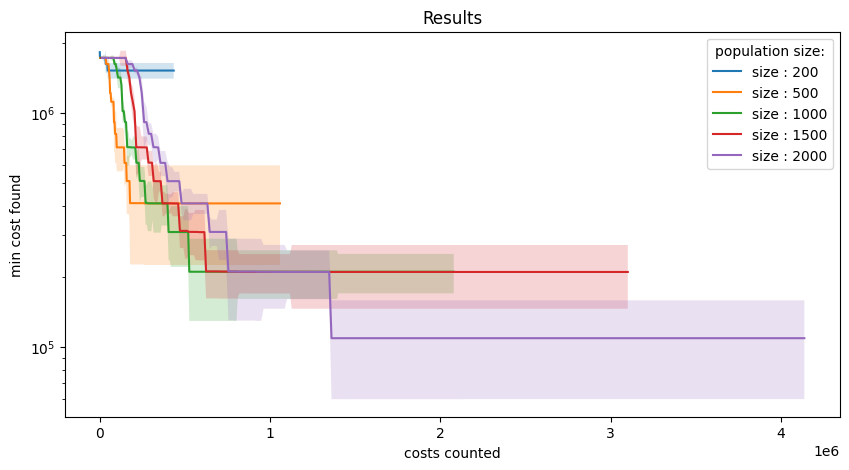

In [6]:
a_medians, a_std, a_labels, costs_counter = [], [], [], []

population_sizes = [200, 500, 1000, 1500, 2000]

for size in population_sizes:
    a_labels.append(f"size : {size}")
    results, cost_counter  = test_differential_algorithm(data, population_size=size, n_generations=300)

    medians = np.median(results, axis=0)
    stds = np.std(results, axis=0)

    a_medians.append(medians)
    a_std.append(stds)
    costs_counter.append(cost_counter)


plot_results('population size:', a_labels, a_medians, a_std, costs_counter)

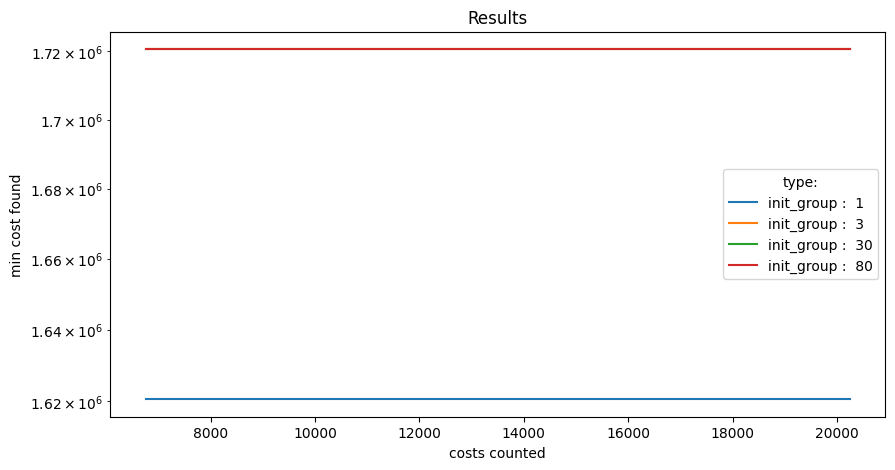

In [ ]:
a_medians, a_std, a_labels, costs_counter = [], [], [], []

init_groups = [1, 3, 30, 80]

for init_group in init_groups:
    a_labels.append(f"init_group :  {init_group}")
    results, cost_counter  = test_differential_algorithm(data, num_of_init_chunks=init_group, n_generations=500)

    medians = np.median(results, axis=0)
    stds = np.std(results, axis=0)

    a_medians.append(medians)
    a_std.append(stds)
    costs_counter.append(cost_counter)


plot_results('type:', a_labels, a_medians, a_std, costs_counter)


In [ ]:
algorithms = [test_genetic_algorithm, test_differential_algorithm]
a_medians, a_std, costs_counter = [], [], []

for algorithm in algorithms:
    results, cost_counter  = algorithm(data, n_generations=300)

    medians = np.median(results, axis=0)
    stds = np.std(results, axis=0)

    a_medians.append(medians)
    a_std.append(stds)
    costs_counter.append(cost_counter)

plot_results('optimal genetic vs differential', ["genetic", "differential"], a_medians, a_std, costs_counter)

NameError: name 'test_genetic_algorithm' is not defined